In [579]:
import pandas as pd                             #used for data manipulation and analysis
from scipy.io.arff import loadarff              #used to read an arff file.
import seaborn as sn                            #used to plot heatmaps 
import matplotlib.pyplot as plt                 #used to graphicaly show results
import tensorflow as tf
import numpy as np

#sklearn is simple and efficient library for predictive data analisys
from sklearn.model_selection import train_test_split                         
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer,precision_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier



In [580]:
raw_data = loadarff('phpgNaXZe (1).arff') #loads the file form the same folder, and the data is returned as a record array,
df = pd.DataFrame(raw_data[0])            #Data structure also contains labeled axes (rows and columns).


renaming the columns to their actual name

In [581]:
df.head() # at first glance, we notice we don`t have the column names  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160.0,12.00,5.73,23.11,b'1',49.0,25.30,97.20,52.0,b'2'
1,144.0,0.01,4.41,28.61,b'2',55.0,28.87,2.06,63.0,b'2'
2,118.0,0.08,3.48,32.28,b'1',52.0,29.14,3.81,46.0,b'1'
3,170.0,7.50,6.41,38.03,b'1',51.0,31.99,24.26,58.0,b'2'
4,134.0,13.60,3.50,27.78,b'1',60.0,25.99,57.34,49.0,b'2'


                                                                DATA PREPARATION

replacing the column names with their actual descriptive name 

In [582]:
df.rename(columns={'V1': 'sbp', 'V2': 'tobacco', 'V3': 'ldl', 'V4': 'adiposity', 'V5': 'famhist', 'V6': 'type', 'V7': 'obesity', 'V8': 'alcohol', 'V9': 'age','Class':'chd'}, inplace=True)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160.0,12.00,5.73,23.11,b'1',49.0,25.30,97.20,52.0,b'2'
1,144.0,0.01,4.41,28.61,b'2',55.0,28.87,2.06,63.0,b'2'
2,118.0,0.08,3.48,32.28,b'1',52.0,29.14,3.81,46.0,b'1'
3,170.0,7.50,6.41,38.03,b'1',51.0,31.99,24.26,58.0,b'2'
4,134.0,13.60,3.50,27.78,b'1',60.0,25.99,57.34,49.0,b'2'


In [583]:
df.isnull().sum() # checking if theres null values in the data set
# from the output below we have no missing/ empty data 

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
type         0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [584]:
# an array with the columns names, to be used later for test train and normalising the data 
df_col = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age']

                                                            NORMALISATION

In [585]:
Lbl_En = LabelEncoder()   
scale = MinMaxScaler()
#feature_range =(0,100)

# makes everything the same integer/ float  for the purposes of training and testing 
df['famhist'] = Lbl_En.fit_transform(df['famhist']) # makes the famhist and chd column from b.0 or b.1 to 0 and 1 , so strings or objects to integers 
df['chd']     = Lbl_En.fit_transform(df['chd'])

df[df_col] = scale.fit_transform(df[df_col]) #normalises the values in the columns betwen 0 and 1 

#df['sbp'] = scale.fit_transform(df['sbp'].values.reshape(-1,1))

#checking if we have 0 and 1`s at famhist and chd and and the rest of the data is normalised
df.head()


,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,0.504274,0.384615,0.331010,0.457902,0.0,0.553846,0.332497,0.660371,0.755102,1
1,0.367521,0.000321,0.239024,0.611748,1.0,0.646154,0.444479,0.013996,0.979592,1
2,0.145299,0.002564,0.174216,0.714406,0.0,0.600000,0.452949,0.025885,0.632653,0
3,0.589744,0.240385,0.378397,0.875245,0.0,0.584615,0.542346,0.164821,0.877551,1
4,0.282051,0.435897,0.175610,0.588531,0.0,0.723077,0.354141,0.389565,0.693878,1


Normalization is the process of scaling individual samples to have unit norm.

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    float64
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    float64
 5   type       462 non-null    float64
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    float64
 9   chd        462 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 34.4 KB


In [587]:
df.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,0.319033,0.116527,0.262044,0.522146,0.584416,0.616983,0.355838,0.115799,0.567674,0.346320
std,0.175182,0.147212,0.144314,0.217642,0.493357,0.151039,0.132173,0.166323,0.298142,0.476313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.196581,0.001683,0.160453,0.364615,0.000000,0.523077,0.259881,0.003465,0.326531,0.000000
50%,0.282051,0.064103,0.234146,0.541958,1.000000,0.615385,0.348338,0.051022,0.612245,0.000000
75%,0.401709,0.176282,0.335192,0.684965,1.000000,0.723077,0.432795,0.162324,0.816327,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


                                                                    TEST & TRAIN 

In [588]:
#Before implementing any classification algorithm, we will divide our dataset into training data and test data.
#I have used 70% of the data for training and the remaining 30% will be used for testing.

X_train, X_test, y_train, y_test = train_test_split(df[df_col], df['chd'], test_size=0.30, random_state=0)

In [589]:
                                                            #checks
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (323, 9)
Training Labels Shape: (323,)
Testing Features Shape: (139, 9)
Testing Labels Shape: (139,)


                                                                        Baseline precision

In [590]:
# precision TP / (TP +FP)
# Recall TP / (TP + FN)

#keeps the porobabilities for the positives outcome only 
probs = y_test[:1]

probability = [probs] *len(y_test)

Baseline_Precision = precision_score(y_test,probability) # returns 1d array 

print(f'the Baseline precision is: {round(Baseline_Precision * 100, 0)}%' )


the Baseline precision is: 35.0%


                                                                     BASELINE ACCURACY

In [591]:
import statistics

guess = statistics.mode(df['chd'])
prediction = [guess] *len(y_test)

Baseline_Accuracy = accuracy_score(y_test , prediction)
print(f'the base line accuracy is: {round(Baseline_Accuracy*100, 0)}%' )
#learned from [1]
#guess #the item that acures the most in the dataset,basically here without using any model at all we are going to predict if the person has the diesese or not


the base line accuracy is: 65.0%


                                                                    K-NEAREST NEIGHBOUR

In [592]:
knn = KNeighborsClassifier(n_neighbors = 11, n_jobs = -1, leaf_size = 60, algorithm = 'auto')
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=60, n_jobs=-1, n_neighbors=11)

In [593]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0])

Text(33.0, 0.5, 'Truth')

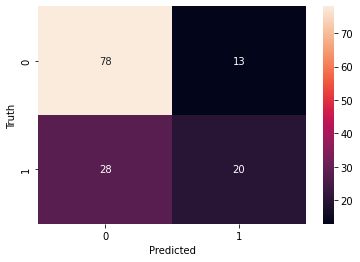

In [594]:
cm_knn = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.Figure(figsize=(9,7))
sn.heatmap(cm_knn,annot =True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [595]:
accuracy_of_KNN = accuracy_score(y_test, y_pred)
print(f'the K-NN accuracy is: {round(accuracy_of_KNN * 100, 0)}%' )

the K-NN accuracy is: 71.0%


In [596]:
#recall and precision
recall_of_knn = cm_knn[0][0]/(cm_knn[0][0] + cm_knn[0][1])
precision_of_knn = cm_knn[0][0]/(cm_knn[0][0]+cm_knn[1][1])
recall_of_knn,precision_of_knn

(<tf.Tensor: shape=(), dtype=float64, numpy=0.8571428571428571>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.7959183673469388>)

                                                                     ARTIFICIAL NEURAL NETWORKS

In [597]:
#ANN  
ann = MLPClassifier(max_iter=3000)

#Parameters
parameters = {'solver': ['lbfgs'],
             'alpha':[1e-4],
             'hidden_layer_sizes':(9,5,5,2),   # 9 input, 5-5 neuron in 2 layers,1 output layer
             'random_state': [1],
             'max_iter':[1700],
             'early_stopping':[False]}

In [598]:
# Type of scoring to compare parameter combos 
scorer = make_scorer(accuracy_score)

# Run grid search 
grid_obj = GridSearchCV(ann, parameters, scoring=scorer,cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Pick the best combination of parameters
ann = grid_obj.best_estimator_

In [599]:
ann.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=2, max_iter=1700, random_state=1,
              solver='lbfgs')

In [600]:
y_pred_ann = ann.predict(X_test)
y_pred_ann

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0])

Text(33.0, 0.5, 'Truth')

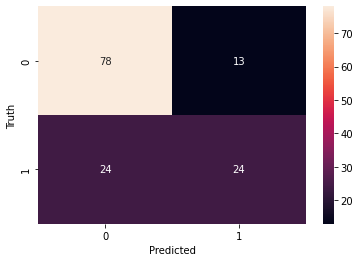

In [601]:
# Making the Confusion Matrix
cm_ann = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_ann)

plt.Figure(figsize=(9,7))
sn.heatmap(cm_ann,annot =True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [602]:
accuracy_of_ANN = accuracy_score(y_test, y_pred_ann)
print(f'the ANN accuracy is: {round( accuracy_of_ANN * 100, 0)}%' )

the ANN accuracy is: 73.0%


In [603]:
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
recall_ann,precision_ann

(<tf.Tensor: shape=(), dtype=float64, numpy=0.8571428571428571>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.7647058823529411>)

Zoomed view having lower y limit 50, higher y limit 90, for better view

In [649]:
                                                      #learned from : [2]
from tensorflow import keras 

model = keras.Sequential([
    keras.layers.Dense(9 ,input_shape=(9, ),activation='relu'),
    keras.layers.Dense(5 ,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
     ])
     
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=180)


Epoch 1/180
11/11 [==============================] - 1s 4ms/step - loss: 0.6909 - accuracy: 0.6192
Epoch 2/180
11/11 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.6254
Epoch 3/180
11/11 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.6316
Epoch 4/180
11/11 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.6471
Epoch 5/180
11/11 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.6471
Epoch 6/180
11/11 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.6502
Epoch 7/180
11/11 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.6533
Epoch 8/180
11/11 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.6533
Epoch 9/180
11/11 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.6533
Epoch 10/180
11/11 [==============================] - 0s 4ms/step - loss: 0.6300 - accuracy: 0.6533
Epoch 11/

In [650]:
yp = model.predict(X_test)
#yp        # returns a 2d array, not useful for the confusion matrix

In [651]:
#converting the 2d array to 1 dimention array 
y_pred_annK =[]
for element in yp:
    if element > 0.5:
        y_pred_annK.append(1)
    else:
        y_pred_annK.append(0)
y_pred_annK[:10]
# [2]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

Text(33.0, 0.5, 'Truth')

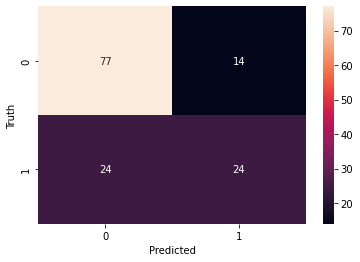

In [653]:
cm_ann_keras = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_annK)

plt.Figure(figsize=(9,7))
sn.heatmap(cm_ann_keras,annot =True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth') 
#[2]

In [654]:
accuracy_of_ANN_keras = accuracy_score(y_test, y_pred_annK)
print(f'the ANN_K accuracy is: {round( accuracy_of_ANN_keras * 100, 0)}%' )

the ANN_K accuracy is: 73.0%


In [655]:
recall_Ann_k = cm_ann_keras[0][0]/(cm_ann_keras[0][0] + cm_ann_keras[0][1])
precision_Ann_k = cm_ann_keras[0][0]/(cm_ann_keras[0][0]+cm_ann_keras[1][1])
recall_Ann_k,precision_Ann_k

(<tf.Tensor: shape=(), dtype=float64, numpy=0.8461538461538461>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.7623762376237624>)

                                                         Graphical Representation

In [656]:

results = {'Accuracy': [Baseline_Accuracy*100,accuracy_of_KNN*100,accuracy_of_ANN*100,accuracy_of_ANN_keras*100],
           'Precision': [Baseline_Precision*100,precision_of_knn*100,precision_ann*100,precision_Ann_k*100],
           'Recall': [0,recall_of_knn*100,recall_ann*100,recall_Ann_k*100]}

index = ['BaseLine','KNN','ANN','ANN_K']


In [657]:
#Data structure contains labeled axes (rows and columns).
results =pd.DataFrame(results,index=index)

Bar Plot of two model implemented //
X axis : Models //
Y axis : Values of Accuracy precision and recall

In [658]:
#converts objects, to plot them on a graph
results= results.astype(float, errors = 'raise')

In [659]:
results

,Accuracy,Precision,Recall
BaseLine,65.467626,34.532374,0.000000
KNN,70.503597,79.591837,85.714286
ANN,73.381295,76.470588,85.714286
ANN_K,72.661871,76.237624,84.615385


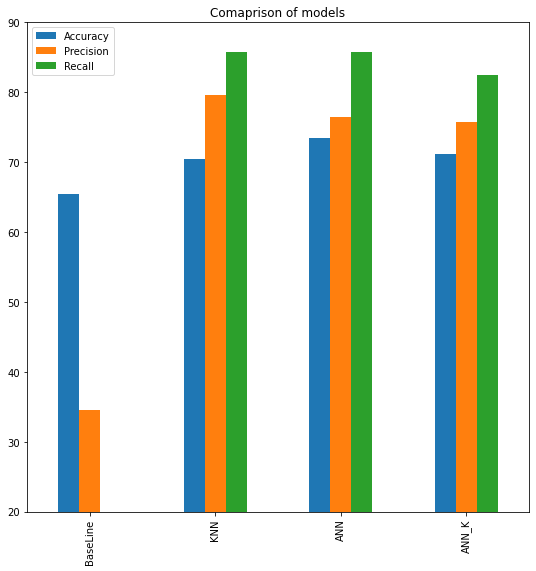

In [614]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(9,9),ylim=[20,90]).get_figure()

                                                                        REFERENCES
                                                                    

[1] https://www.youtube.com/watch?v=Jf-6asHKLQw&ab_channel=EvidenceN
[2] https://www.youtube.com/watch?v=MSBY28IJ47U&ab_channel=codebasics